# Table of Contents
 <p>

In [1]:
import os
import pandas as pd
import numpy as np

import utils

import matplotlib
from matplotlib import pyplot as plt
%matplotlib notebook

In [2]:
NSRDB_PATH = os.path.expanduser('/Users/benellis/data_sets/nsrdb/srrl_area/')
GROUND_PATH = os.path.expanduser('/Users/benellis/data_sets/srrl/with_clouds/')

In [3]:
nsrdb_df = utils.read_dir_nsrdb(NSRDB_PATH, 'US/Mountain')
ground_df = utils.read_srrl_dir(GROUND_PATH, 'Etc/GMT+7', 'US/Mountain')

In [4]:
nsrdb_df.index = nsrdb_df.index.tz_convert('UTC')
ground_df.index = ground_df.index.tz_convert('UTC')

In [5]:
ground_df['GHI'] = ground_df['Global 40-South LI-200 [W/m^2]']

In [6]:
nsrdb_df[nsrdb_df['GHI'] < 0] = 0
ground_df[ground_df['GHI'] < 0] = 0
ground_df[ground_df['Total Cloud Cover [%]'] < 0] = 0
ground_df[ground_df['Opaque Cloud Cover [%]'] < 0] = 0

In [7]:
nsrdb_df['sky_status'] = (nsrdb_df['Cloud Type'] == 0) & (nsrdb_df['GHI'] > 0)

In [8]:
intersection = nsrdb_df.index.intersection(ground_df.index)

In [9]:
intersection = intersection[intersection >= '01-01-2010']# & intersection < '01-01-2011']
intersection = intersection[intersection < '01-01-2011']

In [10]:
nsrdb = nsrdb_df.loc[intersection]
ground = ground_df.loc[intersection]

<IPython.core.display.Javascript object>


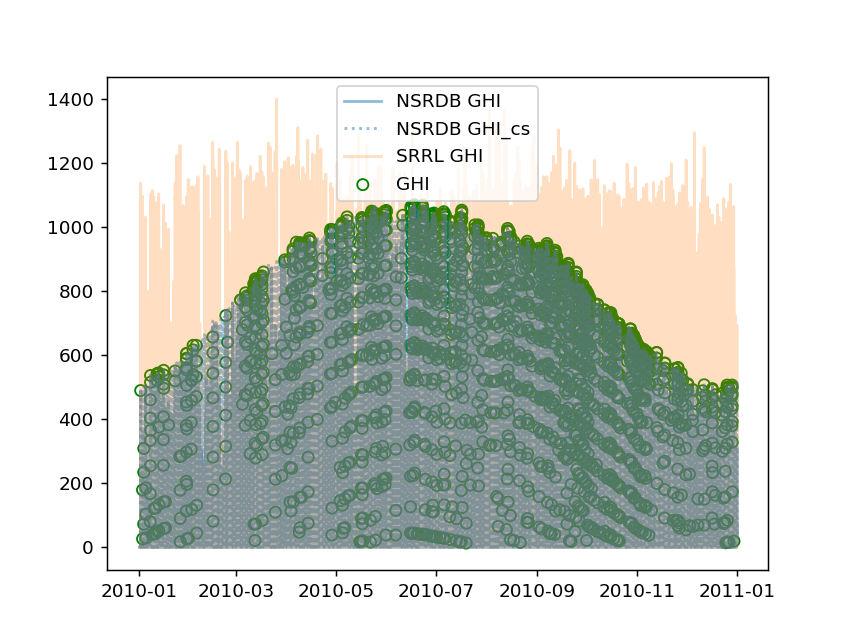

In [11]:
fig, ax = plt.subplots()

p1 = ax.plot(nsrdb.index, nsrdb['GHI'], alpha=.5, label='NSRDB GHI')
p2 = ax.plot(nsrdb.index, nsrdb['Clearsky GHI'], alpha=.5, label='NSRDB GHI_cs', c=p1[0].get_color(), linestyle=':')
p2 = ax.plot(ground.index, ground['GHI'], alpha=.25, label='SRRL GHI')

p3 = ax.scatter(nsrdb[nsrdb['sky_status'] == 1].index, nsrdb[nsrdb['sky_status'] ==1]['GHI'], edgecolor='green', facecolor='none')



_ = ax.legend()

<IPython.core.display.Javascript object>


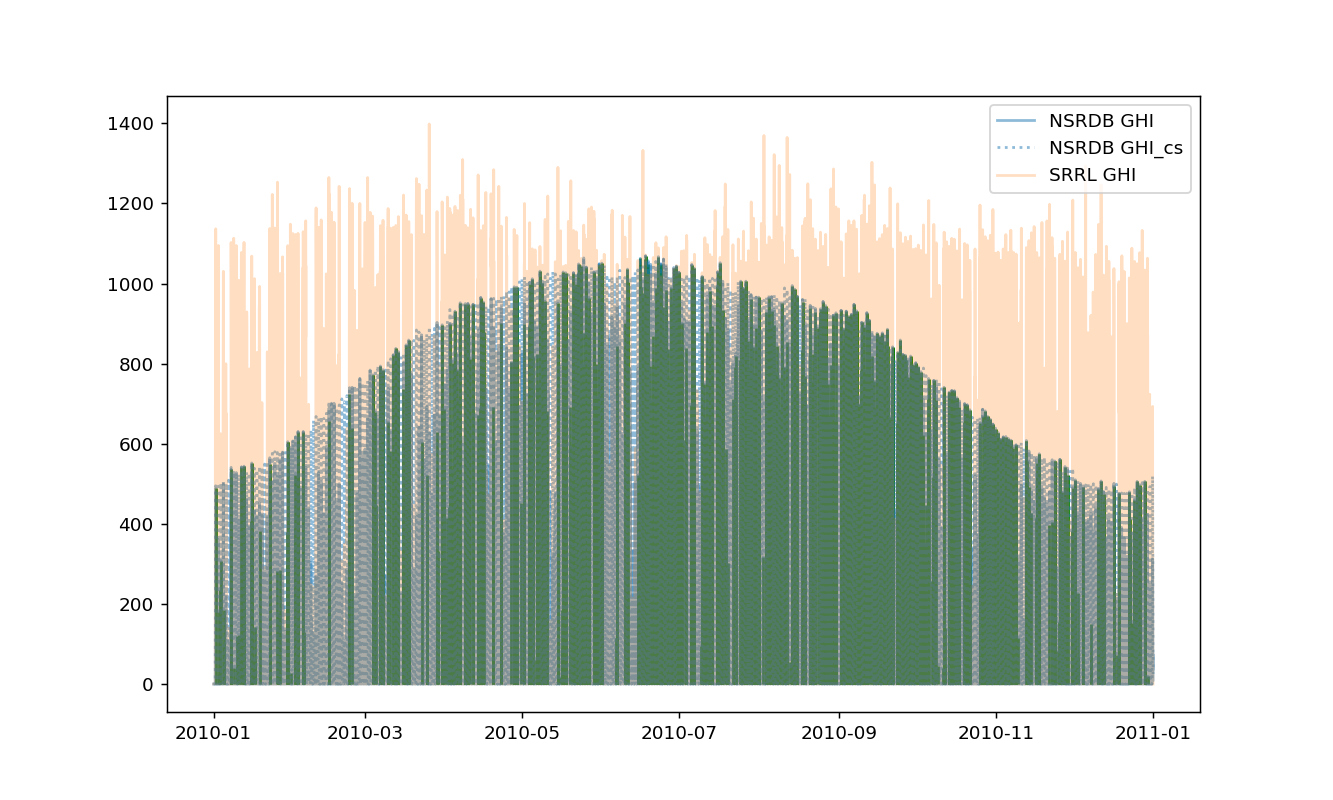

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

p1 = ax.plot(nsrdb.index, nsrdb['GHI'], alpha=.5, label='NSRDB GHI')
p2 = ax.plot(nsrdb.index, nsrdb['Clearsky GHI'], alpha=.5, label='NSRDB GHI_cs', c=p1[0].get_color(), linestyle=':')
p2 = ax.plot(ground.index, ground['GHI'], alpha=.25, label='SRRL GHI')

p3 = ax.vlines(nsrdb[nsrdb['sky_status'] == 1].index, 
               ymin=[0 for _ in nsrdb[nsrdb['sky_status'] == 1]['GHI']],
               ymax=nsrdb[nsrdb['sky_status'] ==1]['GHI'], edgecolor='green', facecolor='none')

_ = ax.legend()

<IPython.core.display.Javascript object>


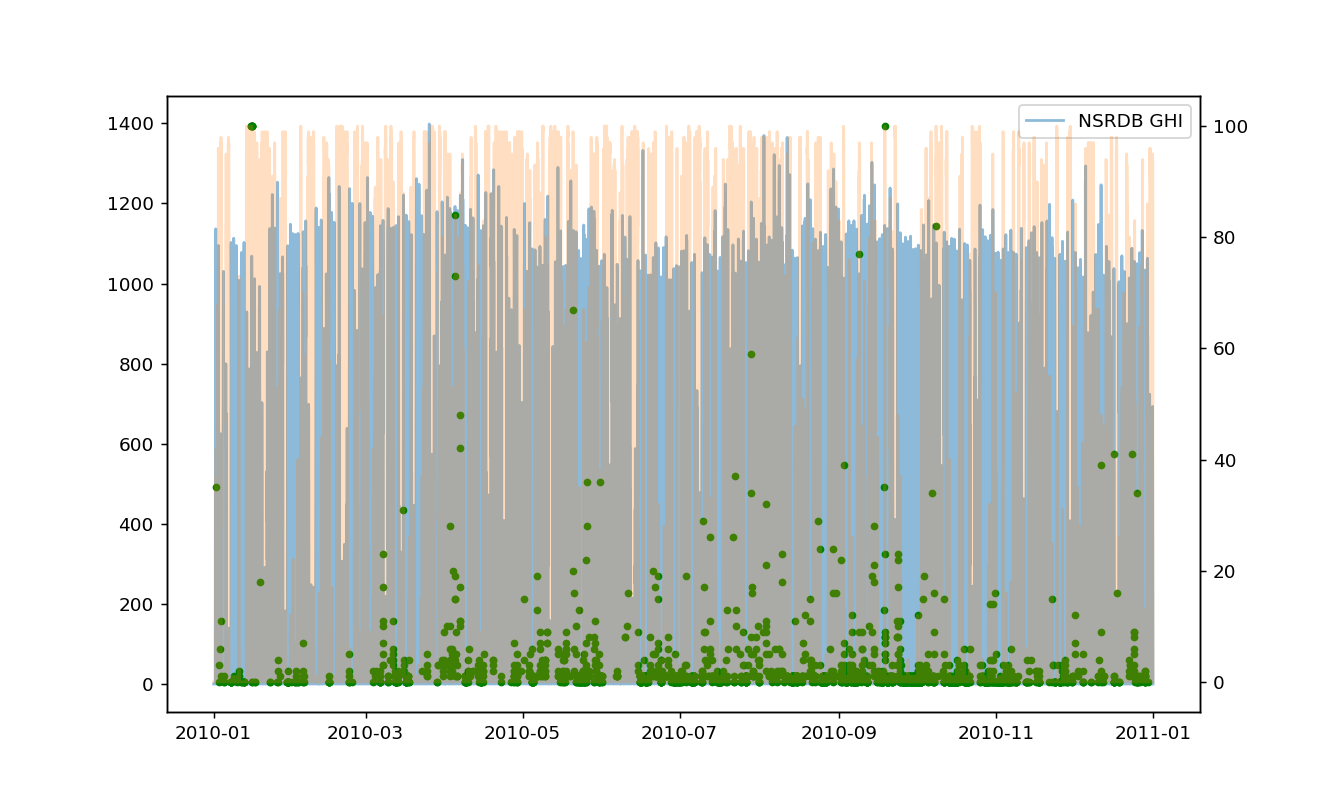

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

# p1 = ax.plot(nsrdb.index, nsrdb['GHI'], alpha=.5, label='NSRDB GHI')
p2 = ax.plot(ground.index, ground['GHI'], alpha=.5, label='NSRDB GHI')
# p2 = ax.plot(ground.index, ground['Total Cloud Cover [%]'], alpha=.0, label='TCC', color='C1')
ax2 = ax.twinx()
p2 = ax2.plot(ground.index, ground['Total Cloud Cover [%]'], alpha=.25, label='TCC', color='C1')

p3 = ax2.scatter(ground[nsrdb['sky_status'] == 1].index, ground[nsrdb['sky_status'] == 1]['Total Cloud Cover [%]'], color='green', s=10)

_ = ax.legend()

In [14]:
ground[nsrdb['sky_status'] == 0]['Opaque Cloud Cover [%]'].describe()

count    15380.000000
mean        11.364629
std         22.223561
min          0.000000
25%          0.000000
50%          0.000000
75%          9.000000
max        100.000000
Name: Opaque Cloud Cover [%], dtype: float64

In [15]:
ground[nsrdb['sky_status'] == 0]['Total Cloud Cover [%]'].describe()

count    15380.000000
mean        18.928934
std         33.388294
min          0.000000
25%          0.000000
50%          0.000000
75%         21.000000
max        100.000000
Name: Total Cloud Cover [%], dtype: float64

<IPython.core.display.Javascript object>


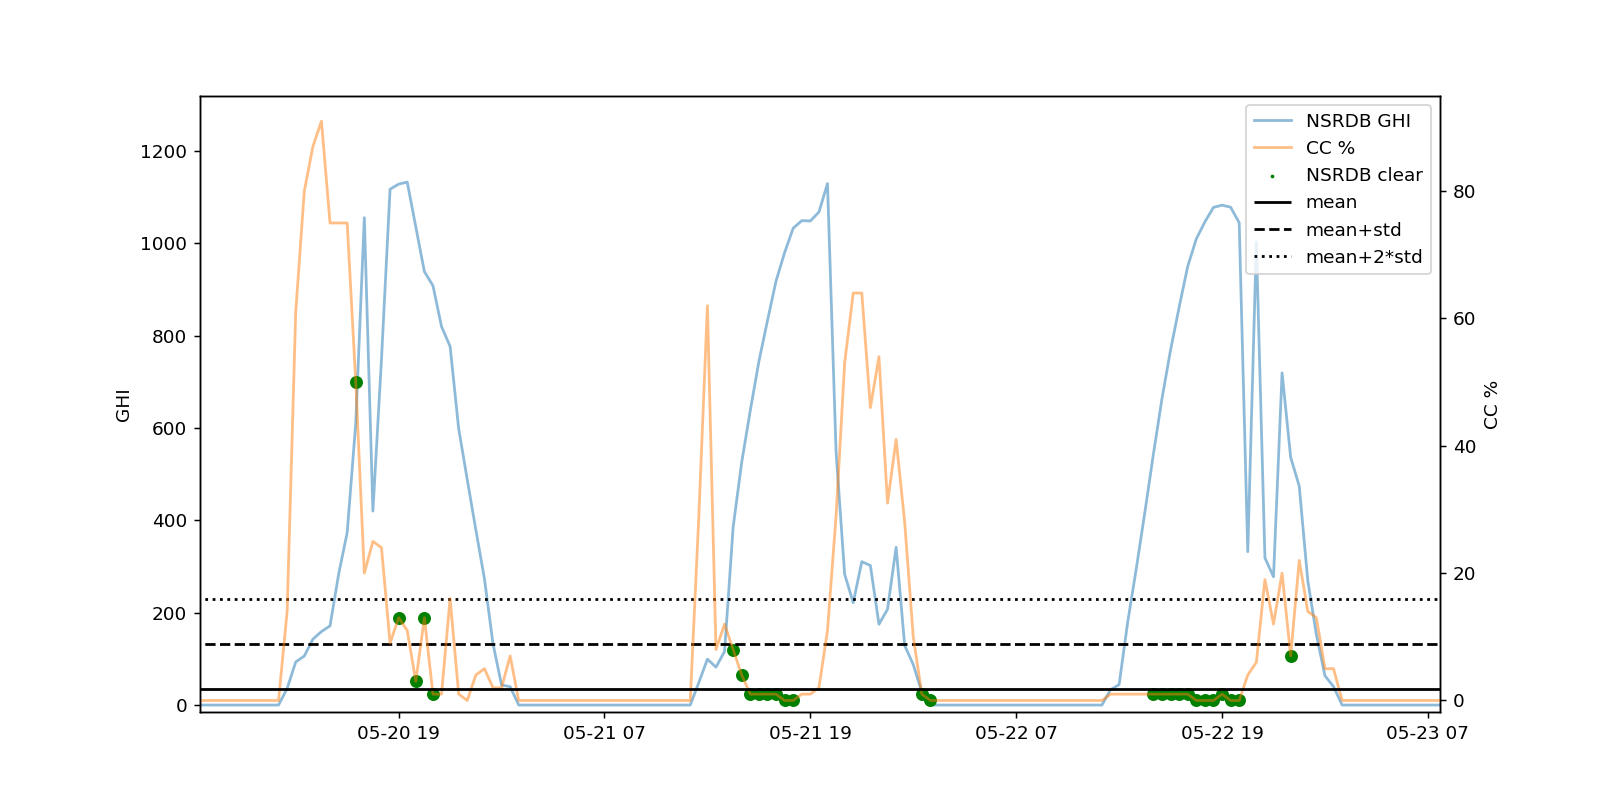

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

p0 = ax.plot(ground.index, ground['GHI'], alpha=.5, label='NSRDB GHI')

ax2 = ax.twinx()

p1 = ax2.plot(ground.index, ground['Opaque Cloud Cover [%]'], alpha=.5, label='TCC', color='C1')
_ = ax.plot(np.nan, np.nan, alpha=.5, label='CC %', color='C1')


p2 = ax2.scatter(ground[nsrdb['sky_status'] == 1].index, ground[nsrdb['sky_status'] == 1]['Opaque Cloud Cover [%]'], color='green', alpha=1)
_ = ax.scatter(np.nan, np.nan, color='green', alpha=1, label='NSRDB clear')


ground_describe = ground[nsrdb['sky_status'] == 1]['Opaque Cloud Cover [%]'].describe()

p3 = ax2.hlines(ground_describe['mean'], xmin=ground.index[0], xmax=ground.index[-1], color='black', zorder=100, label='mean')
_ = ax.hlines(np.nan, np.nan, np.nan, color='black', zorder=100, label='mean')

p4 = ax2.hlines(ground_describe['mean'] + ground_describe['std'], xmin=ground.index[0], xmax=ground.index[-1], color='black', linestyle='--', label='mean+std')
_ = ax.hlines(np.nan, np.nan, np.nan, color='black', linestyle='--', label='mean+std')

p5 = ax2.hlines(ground_describe['mean'] + 2 * ground_describe['std'], xmin=ground.index[0], xmax=ground.index[-1], color='black', linestyle=':', label='mean+2*std')
_ = ax.hlines(np.nan, np.nan, np.nan, color='black', linestyle=':', label='mean+2*std')

# objs = [p0, p1, p2, p3, p4, p5]
# labs = [x.get_label() for x in objs]

ax.set_ylabel('GHI')
ax2.set_ylabel('CC %')

_ = ax.legend()